In [1]:
#importing libraries

import matplotlib
import matplotlib.pyplot as plt
import random

import pandas as pd
import numpy as np

from tqdm import tqdm

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split

import pickle

In [2]:
!curl --header 'Host: doc-0k-3c-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --cookie 'AUTH_f2a3s1o42b8g35crk5oc04dket414mml=00584139903400704852|1601981700000|h67ifhdsv5v7pjcf3p8hkbsfaqcbqebt' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-0k-3c-docs.googleusercontent.com/docs/securesc/iag7nsppr0gd9sfg3kf3nt5k7klifi6v/a5mjnvl872u03op3ntinpk9oancj6o98/1601981775000/00584139903400704852/00584139903400704852/1DgDVP3yS_kxGCVYV0wMwvT7WH5tFssM_?e=download&authuser=0' --output 'varriables.pickle'
!curl --header 'Host: doc-0k-3c-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --cookie 'AUTH_f2a3s1o42b8g35crk5oc04dket414mml=00584139903400704852|1601981700000|h67ifhdsv5v7pjcf3p8hkbsfaqcbqebt' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-0k-3c-docs.googleusercontent.com/docs/securesc/iag7nsppr0gd9sfg3kf3nt5k7klifi6v/s0aur0nar3v0fd9uuaeb2lqum5lf8ft7/1601981700000/00584139903400704852/00584139903400704852/1--GoNpq_vgdhRd1_B9eCGgi0ZeA4kk8n?e=download&authuser=0' --output 'scalar.pkl'
!curl --header 'Host: doc-08-3c-docs.googleusercontent.com' --user-agent 'Mozilla/5.0 (X11; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0' --header 'Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8' --header 'Accept-Language: en-US,en;q=0.5' --cookie 'AUTH_f2a3s1o42b8g35crk5oc04dket414mml_nonce=v31tftoeakgvq' --header 'Upgrade-Insecure-Requests: 1' 'https://doc-08-3c-docs.googleusercontent.com/docs/securesc/iag7nsppr0gd9sfg3kf3nt5k7klifi6v/pu6q8bssrrejb0kdtbineh6k69un4vib/1601981700000/00584139903400704852/00584139903400704852/1QSwIHxbn-DhInBQ9Q3CYV0W9VyeviEUO?e=download&authuser=0&nonce=v31tftoeakgvq&user=00584139903400704852&hash=p1hted1q0orqtr87fagtad0giisala5c' --output 'falls.zip'

!unzip /content/falls.zip
!pip install seaborn --upgrade

import seaborn as sns

print(sns.__version__)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 20021  100 20021    0     0  93120      0 --:--:-- --:--:-- --:--:-- 93120
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  6100  100  6100    0     0  28240      0 --:--:-- --:--:-- --:--:-- 28240
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.3M    0 21.3M    0     0  12.2M      0 --:--:--  0:00:01 --:--:-- 12.2M
Archive:  /content/falls.zip
   creating: falls/
  inflating: falls/equip_failures_test_set.csv  
  inflating: falls/equip_failures_training_set.csv  
Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.0)
0.11.0


###Loading scaler

In [3]:
#Loading Scaler

filename = '/content/scalar.pkl'

	
with open(filename, 'rb') as f:
    scaler = pickle.load(f)

print(scaler)

StandardScaler(copy=True, with_mean=True, with_std=True)


###Loading varriables

In [4]:
#Loading varriables

filename = '/content/varriables.pickle'

with open(filename, 'rb') as f:
    high_nan_features, median, time_based_sensor, bottom_n_features, useless_features = pickle.load(f)

print("high_nan_features = ",high_nan_features)
print("median = ",median)
print("time_based_sensor = ",time_based_sensor)
print("bottom_n_features = ",bottom_n_features)
print("useless_features = ",useless_features)

high_nan_features =  ['sensor2_measure', 'sensor38_measure', 'sensor39_measure', 'sensor40_measure', 'sensor41_measure', 'sensor42_measure', 'sensor43_measure', 'sensor68_measure']
median =  sensor1_measure                 30755.0
sensor3_measure                   152.0
sensor4_measure                   126.0
sensor5_measure                     0.0
sensor6_measure                     0.0
                                 ...   
sensor105_histogram_bin7_nan        0.0
sensor105_histogram_bin8_nan        0.0
sensor105_histogram_bin9_nan        0.0
sensor106_measure_nan               0.0
sensor107_measure_nan               0.0
Length: 332, dtype: float64
time_based_sensor =  [['sensor7_histogram_bin0', 'sensor7_histogram_bin1', 'sensor7_histogram_bin2', 'sensor7_histogram_bin3', 'sensor7_histogram_bin4', 'sensor7_histogram_bin5', 'sensor7_histogram_bin6', 'sensor7_histogram_bin7', 'sensor7_histogram_bin8', 'sensor7_histogram_bin9'], ['sensor24_histogram_bin0', 'sensor24_histogram_bin1', 's

###Loading dataframe

In [5]:
#Loading dataframe
df = pd.read_csv("/content/falls/equip_failures_training_set.csv")

df.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,na,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


###Replace na with np.nan

In [6]:
"""Instead of nan value we have na, so we will replace na with np.nan"""

df = df.replace('na', np.NaN)
df.head()

,id,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,1,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,...,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,2,0,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,...,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,3,0,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,...,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,4,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,...,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,20174,44,0,0,0,1.08,54,5670,1566,240,46,58,44,10,0,0,0,4,32
4,5,0,60874,NaN,1368,458,0,0,0,0,0,0,43752,1966618,1800340,131646,4588,0,1974038,0,226,0,0,0,3230626,2618878,1058136,551022,0,0,0,0,1788,642,0,0,0,0,42124,372236,...,0,3590004,2026,444,0,0,0,0,0,0,0,0,44946,62648,11506,0,0,149474,35154,457040,80482,98334,27588,0,0,21173050,1116.06,1176,404740,904230,622012,229790,405298,347188,286954,311560,433954,1218,0,0


###Change data-type of dataframe

In [7]:
"We could see that few coloumns are of int type, and other are of object type,So for using data we need to make them float data type"

df = df.astype("float32")
df.dtypes

id                          float32
target                      float32
sensor1_measure             float32
sensor2_measure             float32
sensor3_measure             float32
                             ...   
sensor105_histogram_bin7    float32
sensor105_histogram_bin8    float32
sensor105_histogram_bin9    float32
sensor106_measure           float32
sensor107_measure           float32
Length: 172, dtype: object

###Drop useless coloumn from feature

In [8]:
"""id coloumn is just index, we don't need it , so we will drop it"""
df = df.drop(["id"],axis=1)
df.head()

,target,sensor1_measure,sensor2_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,...,sensor77_measure,sensor78_measure,sensor79_measure,sensor80_measure,sensor81_measure,sensor82_measure,sensor83_measure,sensor84_measure,sensor85_measure,sensor86_measure,sensor87_measure,sensor88_measure,sensor89_measure,sensor90_measure,sensor91_measure,sensor92_measure,sensor93_measure,sensor94_measure,sensor95_measure,sensor96_measure,sensor97_measure,sensor98_measure,sensor99_measure,sensor100_measure,sensor101_measure,sensor102_measure,sensor103_measure,sensor104_measure,sensor105_histogram_bin0,sensor105_histogram_bin1,sensor105_histogram_bin2,sensor105_histogram_bin3,sensor105_histogram_bin4,sensor105_histogram_bin5,sensor105_histogram_bin6,sensor105_histogram_bin7,sensor105_histogram_bin8,sensor105_histogram_bin9,sensor106_measure,sensor107_measure
0,0.0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,...,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.800049,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,...,NaN,NaN,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.760010,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,...,0.0,2341048.0,1494.0,152.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13876.0,38182.0,8138.0,0.0,0.0,65772.0,10534.0,300240.0,48028.0,0.0,0.0,0.0,0.0,1040120.0,1018.640015,1020.0,262032.0,453378.0,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,318.0,2212.0,3232.0,1872.0,0.0,0.0,0.0,2668.0,0.0,0.0,0.0,642.0,3894.0,10184.0,7554.0,10764.0,1014.0,0.0,0.0,0.0,0.0,60.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2578.0,76.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,232.0,0.0,0.0,2014.0,370.0,48.0,18.0,15740.0,1822.0,20174.0,44.0,0.0,0.0,0.0,1.080000,54.0,5670.0,1566.0,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,0.0,43752.0,1966618.0,1800340.0,131646.0,4588.0,0.0,1974038.0,0.0,226.0,0.0,0.0,0.0,3230626.0,2618878.0,1058136.0,551022.0,0.0,0.0,0.0,0.0,1788.0,642.0,0.0,0.0,0.0,0.0,42124.0,372236.0,2128914.0,...,0.0,3590004.0,2026.0,444.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44946.0,62648.0,11506.0,0.0,0.0,149474.0,35154.0,457040.0,80482.0,98334.0,27588.0,0.0,0.0,21173050.0,1116.060059,1176.0,404740.0,904230.0,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954

##Train(D1) , validation(D2) and test(D_test) split

In [9]:
y = df["target"].tolist()
df_ = df.drop(["target"],axis=1)

In [10]:

D1 , D_test , y_1 , y_test = train_test_split( df_ , y , test_size=0.30, stratify = y ,  random_state=42)

D2 , D_test , y_2 , y_test = train_test_split( D_test , y_test , test_size=0.66, stratify = y_test ,  random_state=42)


print("train = ",D1.shape)
print("validation = ",D2.shape)
print("test = ",D_test.shape)

train =  (42000, 170)
validation =  (6120, 170)
test =  (11880, 170)


(array([41300.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   700.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

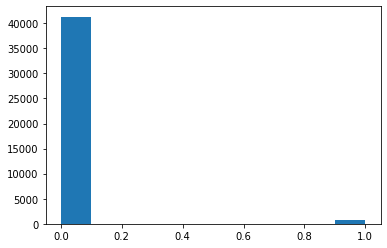

In [11]:
plt.hist(y_1)

(array([6018.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         102.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

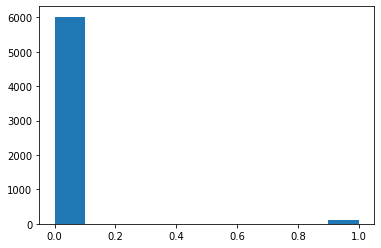

In [12]:
plt.hist(y_2)

(array([11682.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   198.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

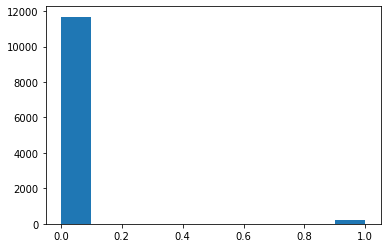

In [13]:
plt.hist(y_test)

###For each feature create new feature, that tells presence of nan, because nan values also contains some information

In [14]:
coloumns = D1.columns

#Train
for coloumn in tqdm(coloumns):
    D1[coloumn + "_nan"] = [1.0 if np.isnan(x) else 0.0 for x in D1[coloumn]]


#Validation
for coloumn in tqdm(coloumns):
    D2[coloumn + "_nan"] = [1.0 if np.isnan(x) else 0.0 for x in D2[coloumn]]


#Test
for coloumn in tqdm(coloumns):
    D_test[coloumn + "_nan"] = [1.0 if np.isnan(x) else 0.0 for x in D_test[coloumn]]


  0%|          | 0/170 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
100%|██████████| 170/170 [00:03<00:00, 50.33it/s]


###Drop features with more than 50% nan values

In [15]:
#Train
D1 = D1.drop(high_nan_features,axis=1)

#Validation
D2 = D2.drop(high_nan_features,axis=1)

#Test
D_test = D_test.drop(high_nan_features,axis=1)


D1.head()

,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,...,sensor77_measure_nan,sensor78_measure_nan,sensor79_measure_nan,sensor80_measure_nan,sensor81_measure_nan,sensor82_measure_nan,sensor83_measure_nan,sensor84_measure_nan,sensor85_measure_nan,sensor86_measure_nan,sensor87_measure_nan,sensor88_measure_nan,sensor89_measure_nan,sensor90_measure_nan,sensor91_measure_nan,sensor92_measure_nan,sensor93_measure_nan,sensor94_measure_nan,sensor95_measure_nan,sensor96_measure_nan,sensor97_measure_nan,sensor98_measure_nan,sensor99_measure_nan,sensor100_measure_nan,sensor101_measure_nan,sensor102_measure_nan,sensor103_measure_nan,sensor104_measure_nan,sensor105_histogram_bin0_nan,sensor105_histogram_bin1_nan,sensor105_histogram_bin2_nan,sensor105_histogram_bin3_nan,sensor105_histogram_bin4_nan,sensor105_histogram_bin5_nan,sensor105_histogram_bin6_nan,sensor105_histogram_bin7_nan,sensor105_histogram_bin8_nan,sensor105_histogram_bin9_nan,sensor106_measure_nan,sensor107_measure_nan
6865,2340.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,60.0,19874.0,110706.0,162.0,0.0,0.0,45216.0,0.0,138.0,NaN,0.0,0.0,116446.0,105774.0,29878.0,7160.0,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,9840.0,83830.0,11606.0,25526.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
56861,32750.0,1008.0,924.0,0.0,0.0,0.0,0.0,0.0,0.0,1432.0,121562.0,1495976.0,584786.0,22586.0,378.0,999438.0,0.0,0.0,0.0,0.0,0.0,1962200.0,1691798.0,347868.0,218608.0,0.0,0.0,0.0,0.0,1398.0,250.0,0.0,0.0,0.0,0.0,0.0,9128.0,614464.0,1589506.0,13622.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9933,16.0,32.0,30.0,0.0,0.0,0.0,0.0,0.0,834.0,2994.0,1156.0,1312.0,0.0,0.0,0.0,968.0,0.0,0.0,0.0,784.0,2314.0,9258.0,7952.0,6870.0,476.0,0.0,0.0,0.0,0.0,26.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6296.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16580,29988.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,14482.0,862878.0,1267182.0,206920.0,846.0,0.0,1128206.0,0.0,0.0,0.0,186.0,276.0,2028836.0,1746126.0,478688.0,222528.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,326066.0,1281456.0,744786.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39049,32.0,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,0.0,10934.0,3186.0,0.0,0.0,5056.0,0.0,0.0,0.0,0.0,0.0,16028.0,12854.0,4676.0,1138.0,0.0,0.0,0.0,0.0,22.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,14228.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Replace nan with median of that coloumn , because values of each feature is either very low or very high, replacing nan with mean is not sensible at all

In [16]:
#Train
D1 = D1.fillna(median)


#Validation
D2 = D2.fillna(median)                                                          #Here we are filling test nan values with, train median


#Test
D_test = D_test.fillna(median)                                                  #Here we are filling test nan values with, train median



D_test.head()

,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,...,sensor77_measure_nan,sensor78_measure_nan,sensor79_measure_nan,sensor80_measure_nan,sensor81_measure_nan,sensor82_measure_nan,sensor83_measure_nan,sensor84_measure_nan,sensor85_measure_nan,sensor86_measure_nan,sensor87_measure_nan,sensor88_measure_nan,sensor89_measure_nan,sensor90_measure_nan,sensor91_measure_nan,sensor92_measure_nan,sensor93_measure_nan,sensor94_measure_nan,sensor95_measure_nan,sensor96_measure_nan,sensor97_measure_nan,sensor98_measure_nan,sensor99_measure_nan,sensor100_measure_nan,sensor101_measure_nan,sensor102_measure_nan,sensor103_measure_nan,sensor104_measure_nan,sensor105_histogram_bin0_nan,sensor105_histogram_bin1_nan,sensor105_histogram_bin2_nan,sensor105_histogram_bin3_nan,sensor105_histogram_bin4_nan,sensor105_histogram_bin5_nan,sensor105_histogram_bin6_nan,sensor105_histogram_bin7_nan,sensor105_histogram_bin8_nan,sensor105_histogram_bin9_nan,sensor106_measure_nan,sensor107_measure_nan
39062,40868.0,2.080000e+02,170.0,0.0,0.0,0.0,0.0,0.0,0.0,38736.0,767570.0,1386862.0,439978.0,31084.0,2976.0,1385392.0,0.0,0.0,0.0,0.0,0.0,2362964.0,2078162.0,606806.0,244316.0,0.0,0.0,0.0,0.0,468.0,80.0,0.0,0.0,0.0,0.0,0.0,42356.0,1002750.0,1608962.0,13136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20915,46282.0,2.130706e+09,2500.0,0.0,0.0,20614.0,96250.0,174206.0,357852.0,452000.0,1108512.0,804208.0,94670.0,1254.0,0.0,1309860.0,0.0,0.0,0.0,0.0,0.0,2912160.0,2613586.0,399894.0,228910.0,0.0,0.0,0.0,0.0,1120.0,296.0,0.0,0.0,0.0,0.0,0.0,86.0,2212524.0,266550.0,630406.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30989,39552.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,42.0,815694.0,1515728.0,537424.0,77180.0,2520.0,0.0,1350938.0,0.0,0.0,0.0,5734.0,10332.0,2520758.0,2011492.0,695844.0,424000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198142.0,1668216.0,1044554.0,37676.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6964,1436.0,6.800000e+01,66.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,20798.0,65620.0,2358.0,0.0,0.0,42266.0,0.0,0.0,0.0,0.0,0.0,83242.0,70374.0,19574.0,7974.0,0.0,0.0,0.0,0.0,152.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,48848.0,40112.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44837,33342.0,3.240000e+02,304.0,0.0,0.0,0.0,0.0,0.0,0.0,5754.0,479290.0,1005988.0,317094.0,15730.0,262.0,828600.0,0.0,0.0,0.0,0.0,0.0,1653788.0,1445456.0,280040.0,181160.0,0.0,0.0,0.0,0.0,488.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,688612.0,1135504.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###We have 100 simple sensor, and 7 time based sensor. Here we will extract min, max and mean from those time based sensors

In [17]:
def mean(a,b,c,d,e,f,g,h,i,j):
    list_ = [a,b,c,d,e,f,g,h,i,j]
    return np.mean(list_)


def min_(a,b,c,d,e,f,g,h,i,j):
    list_ = [a,b,c,d,e,f,g,h,i,j]
    return min(list_)


def max_(a,b,c,d,e,f,g,h,i,j):
    list_ = [a,b,c,d,e,f,g,h,i,j]
    return max(list_)


In [18]:
#Train
for i in tqdm(range(0,len(time_based_sensor))):
    D1[time_based_sensor[i][0].split("_")[0] + "_mean"] = D1.apply(lambda row : mean(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    D1[time_based_sensor[i][0].split("_")[0] + "_min"]  = D1.apply(lambda row : min_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)

    D1[time_based_sensor[i][0].split("_")[0] + "_max"]  = D1.apply(lambda row : max_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)





#Validation
for i in tqdm(range(0,len(time_based_sensor))):
    D2[time_based_sensor[i][0].split("_")[0] + "_mean"] = D2.apply(lambda row : mean(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    D2[time_based_sensor[i][0].split("_")[0] + "_min"]  = D2.apply(lambda row : min_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)

    D2[time_based_sensor[i][0].split("_")[0] + "_max"]  = D2.apply(lambda row : max_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)





#Test
for i in tqdm(range(0,len(time_based_sensor))):
    D_test[time_based_sensor[i][0].split("_")[0] + "_mean"] = D_test.apply(lambda row : mean(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


    D_test[time_based_sensor[i][0].split("_")[0] + "_min"] = D_test.apply(lambda row : min_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)

    D_test[time_based_sensor[i][0].split("_")[0] + "_max"] = D_test.apply(lambda row : max_(row[time_based_sensor[i][0]] , row[time_based_sensor[i][1]] , row[time_based_sensor[i][2]] , 
                                                                                     row[time_based_sensor[i][3]] , row[time_based_sensor[i][4]] , row[time_based_sensor[i][5]] , 
                                                                                     row[time_based_sensor[i][6]] , row[time_based_sensor[i][7]] , row[time_based_sensor[i][8]] , 
                                                                                     row[time_based_sensor[i][9]] ) , axis = 1)


D_test.head()

100%|██████████| 7/7 [00:12<00:00,  1.78s/it]


,sensor1_measure,sensor3_measure,sensor4_measure,sensor5_measure,sensor6_measure,sensor7_histogram_bin0,sensor7_histogram_bin1,sensor7_histogram_bin2,sensor7_histogram_bin3,sensor7_histogram_bin4,sensor7_histogram_bin5,sensor7_histogram_bin6,sensor7_histogram_bin7,sensor7_histogram_bin8,sensor7_histogram_bin9,sensor8_measure,sensor9_measure,sensor10_measure,sensor11_measure,sensor12_measure,sensor13_measure,sensor14_measure,sensor15_measure,sensor16_measure,sensor17_measure,sensor18_measure,sensor19_measure,sensor20_measure,sensor21_measure,sensor22_measure,sensor23_measure,sensor24_histogram_bin0,sensor24_histogram_bin1,sensor24_histogram_bin2,sensor24_histogram_bin3,sensor24_histogram_bin4,sensor24_histogram_bin5,sensor24_histogram_bin6,sensor24_histogram_bin7,sensor24_histogram_bin8,...,sensor98_measure_nan,sensor99_measure_nan,sensor100_measure_nan,sensor101_measure_nan,sensor102_measure_nan,sensor103_measure_nan,sensor104_measure_nan,sensor105_histogram_bin0_nan,sensor105_histogram_bin1_nan,sensor105_histogram_bin2_nan,sensor105_histogram_bin3_nan,sensor105_histogram_bin4_nan,sensor105_histogram_bin5_nan,sensor105_histogram_bin6_nan,sensor105_histogram_bin7_nan,sensor105_histogram_bin8_nan,sensor105_histogram_bin9_nan,sensor106_measure_nan,sensor107_measure_nan,sensor7_mean,sensor7_min,sensor7_max,sensor24_mean,sensor24_min,sensor24_max,sensor25_mean,sensor25_min,sensor25_max,sensor26_mean,sensor26_min,sensor26_max,sensor64_mean,sensor64_min,sensor64_max,sensor69_mean,sensor69_min,sensor69_max,sensor105_mean,sensor105_min,sensor105_max
39062,40868.0,2.080000e+02,170.0,0.0,0.0,0.0,0.0,0.0,0.0,38736.0,767570.0,1386862.0,439978.0,31084.0,2976.0,1385392.0,0.0,0.0,0.0,0.0,0.0,2362964.0,2078162.0,606806.0,244316.0,0.0,0.0,0.0,0.0,468.0,80.0,0.0,0.0,0.0,0.0,0.0,42356.0,1002750.0,1608962.0,13136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,266720.6,0.0,1386862.0,266720.4,0.0,1608962.0,266720.4,0.0,1669178.0,266720.2,0.0,720994.0,266720.2,0.0,1106032.0,266720.2,0.0,1957018.0,266720.4,7614.0,531586.0
20915,46282.0,2.130706e+09,2500.0,0.0,0.0,20614.0,96250.0,174206.0,357852.0,452000.0,1108512.0,804208.0,94670.0,1254.0,0.0,1309860.0,0.0,0.0,0.0,0.0,0.0,2912160.0,2613586.0,399894.0,228910.0,0.0,0.0,0.0,0.0,1120.0,296.0,0.0,0.0,0.0,0.0,0.0,86.0,2212524.0,266550.0,630406.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,310956.6,0.0,1108512.0,310956.6,0.0,2212524.0,310956.6,0.0,3088786.0,310956.6,0.0,1062820.0,310956.6,0.0,1385212.0,310956.6,0.0,1911710.0,310956.6,5330.0,608072.0
30989,39552.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,42.0,815694.0,1515728.0,537424.0,77180.0,2520.0,0.0,1350938.0,0.0,0.0,0.0,5734.0,10332.0,2520758.0,2011492.0,695844.0,424000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,198142.0,1668216.0,1044554.0,37676.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,294858.8,0.0,1515728.0,294858.8,0.0,1668216.0,294858.8,0.0,1740074.0,294858.8,0.0,970754.0,294858.8,0.0,1138042.0,294858.8,0.0,1930168.0,294858.8,374.0,790122.0
6964,1436.0,6.800000e+01,66.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,20798.0,65620.0,2358.0,0.0,0.0,42266.0,0.0,0.0,0.0,0.0,0.0,83242.0,70374.0,19574.0,7974.0,0.0,0.0,0.0,0.0,152.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,48848.0,40112.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8896.0,0.0,65620.0,8896.0,0.0,48848.0,8896.0,0.0,70740.0,8896.0,0.0,43382.0,8896.0,0.0,37998.0,8896.0,0.0,70054.0,8896.0,0.0,55574.0
44837,33342.0,3.240000e+02,304.0,0.0,0.0,0.0,0.0,0.0,0.0,5754.0,479290.0,1005988.0,317094.0,15730.0,262.0,828600.0,0.0,0.0,0.0,0.0,0.0,1653788.0,1445456.0,280040.0,181160.0,0.0,0.0,0.0,0.0,488.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,688612.0,1135504.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,182411.8,0.0,1005988.0,182411.8,0.0,1135504.0,182411.8,0.0,1434066.0,182411.8,220.0,541832.0,182411.8,0.0,810832.0,182411.8,0.0,906636.0,182411.8,80906.0

###Removing all the features which are least correlated to our target

In [19]:
#Train
D1 = D1.drop(bottom_n_features.keys(),axis=1)

#Validation
D2 = D2.drop(bottom_n_features.keys(),axis=1)

#test
D_test = D_test.drop(bottom_n_features.keys(),axis=1)


###Removing all the intercorrelated features

In [20]:
#Train
D1 = D1.drop(useless_features , axis=1)

#Validation
D2 = D2.drop(useless_features , axis=1)

#Test
D_test = D_test.drop(useless_features , axis=1)

In [21]:
print("train_size = ",D1.shape)
print("validation_size = ",D2.shape)
print("test_size = ",D_test.shape)

train_size =  (42000, 232)
validation_size =  (6120, 232)
test_size =  (11880, 232)


###Feature Scaling

In [22]:
#Train
D1 = scaler.transform(D1)


#Train
D2 = scaler.transform(D2)


#Test
D_test = scaler.transform(D_test)

###We will over sample our minority(down hole equip fail) using RandomOverSampler

In [23]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


oversample = RandomOverSampler(sampling_strategy='minority')                           

# fit and apply the transform
D1_over , y_1_over = oversample.fit_resample(D1, y_1)



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [24]:

# summarize class distribution
print("distribution before oversampling = ",Counter(y_1))
print("distribution after  oversampling = ",Counter(y_1_over))
print("-"*50)
print("shape of X_train = ", D1.shape)
print("shape of y_train = ", len(y_1))
print("-"*50)
print("shape of X_train_over = ", D1_over.shape)
print("shape of y_train_over = ", y_1_over.shape)


distribution before oversampling =  Counter({0.0: 41300, 1.0: 700})
distribution after  oversampling =  Counter({0.0: 41300, 1.0: 41300})
--------------------------------------------------
shape of X_train =  (42000, 232)
shape of y_train =  42000
--------------------------------------------------
shape of X_train_over =  (82600, 232)
shape of y_train_over =  (82600,)


#Making 3 dataset(Da,Db,Dc) for 3 models

In [25]:
def make_sample(data=D1_over ,label = y_1_over , size = 42000):
    random_index = np.random.randint(0 , len(data) , size)
    sampled_data  = []
    sampled_label = []

    for random in random_index:
       sampled_data.append(data[random])
       sampled_label.append(label[random])

    return np.array(sampled_data),np.array(sampled_label)

In [26]:
Da,ya = make_sample(data=D1_over ,label = y_1_over , size = 90000)
Db,yb = make_sample(data=D1_over ,label = y_1_over , size = 90000)
Dc,yc = make_sample(data=D1_over ,label = y_1_over , size = 90000)

print("*Distributon of data*")
print("ya = ",Counter(ya))
print("yb = ",Counter(yb))
print("yc = ",Counter(yc))

*Distributon of data*
ya =  Counter({1.0: 45216, 0.0: 44784})
yb =  Counter({0.0: 45067, 1.0: 44933})
yc =  Counter({1.0: 45096, 0.0: 44904})


#Making 3 models

###Decision Tree

In [27]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


from sklearn.metrics import confusion_matrix
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

def plot_confusion_matrix(test_y, predict_y,lables):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = lables
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))




In [28]:
DT_best = DecisionTreeClassifier(class_weight="balanced" , max_depth=30 , min_samples_split = 30)
DT_best.fit(Da,ya)

print("Train F1 Score = ",f1_score(ya , DT_best.predict(Da)))
print("Validation F1 Score = ",f1_score(y_2 , DT_best.predict(D2)))

Train F1 Score =  0.9975291210730673
Validation F1 Score =  0.5949820788530467


###Gradient_Boost_1

In [29]:
import xgboost as xgb

GB1 = xgb.XGBClassifier(max_depth=100,learning_rate=0.12,n_estimators=2000,colsample_bytree=0.4,subsample=0.4)

GB1.fit(Db,yb)

print("Train F1 Score = ",f1_score(yb , GB1.predict(Db)))
print("Validation F1 Score = ",f1_score(y_2 , GB1.predict(D2)))

Train F1 Score =  1.0
Validation F1 Score =  0.7631578947368423


###Gradient_Boost_2

In [30]:
GB2 = xgb.XGBClassifier(max_depth=60,learning_rate=0.1,n_estimators=3000,colsample_bytree=0.7,subsample=0.7)

GB2.fit(Dc,yc)

print("Train F1 Score = ",f1_score(yc , GB2.predict(Dc)))
print("Validation F1 Score = ",f1_score(y_2 , GB2.predict(D2)))

Train F1 Score =  1.0
Validation F1 Score =  0.7911111111111111


###Stacking Classifier

In [31]:
y_1 = np.array(y_1)
y_2 = np.array(y_2)


from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier


GB = xgb.XGBClassifier(max_depth=50,learning_rate=0.1,n_estimators=3000,colsample_bytree=0.7,subsample=0.7)

SC = StackingCVClassifier(classifiers=[DT_best,GB1,GB2], 
                            use_probas=False,
                            use_features_in_secondary=True,
                            meta_classifier=GB)

SC.fit(D1,y_1)

print("Train F1 Score = ",f1_score(y_1 , SC.predict(D1)))
print("Validation F1 Score = ",f1_score(y_2 , SC.predict(D2)))

Train F1 Score =  1.0
Validation F1 Score =  0.8125


In [32]:
print("Test F1 Score = ",f1_score(y_test , SC.predict(D_test)))

Test F1 Score =  0.8222811671087533


###AUC Score

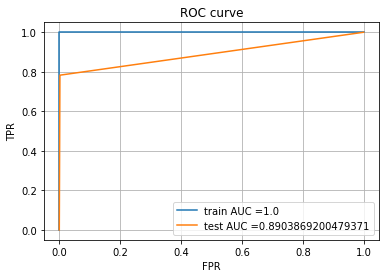

In [33]:
train_fpr, train_tpr, tr_thresholds = roc_curve(y_1, SC.predict(D1))
test_fpr, test_tpr, te_thresholds = roc_curve(y_test , SC.predict(D_test))

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()

###Precision

In [35]:
print("Train precision Score = ",precision_score(y_1 , SC.predict(D1)))
print("Test precision Score = ",precision_score(y_test , SC.predict(D_test)))

Train precision Score =  1.0
Test precision Score =  0.8659217877094972


###Recall

In [36]:
print("Train recall Score = ",recall_score(y_1 , SC.predict(D1)))
print("Test recall Score = ",recall_score(y_test , SC.predict(D_test)))

Train recall Score =  1.0
Test recall Score =  0.7828282828282829


###Confusion matrix test

Number of misclassified points  0.563973063973064
-------------------------------------------------- Confusion matrix --------------------------------------------------


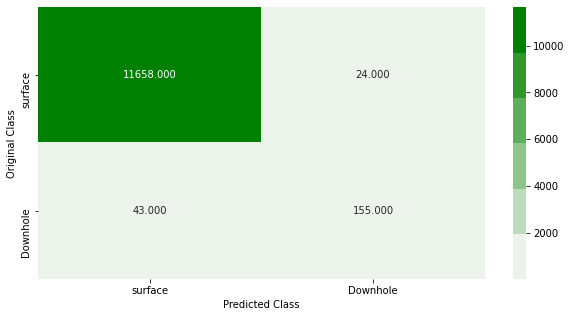

-------------------------------------------------- Precision matrix --------------------------------------------------


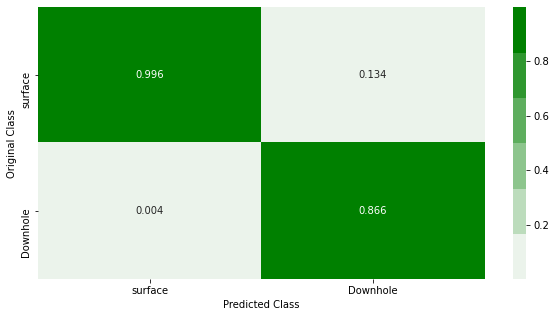

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


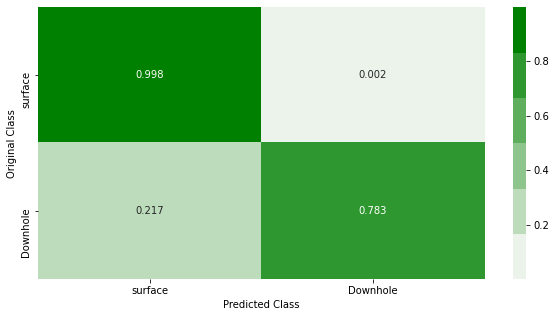

Sum of rows in precision matrix [1. 1.]


In [38]:
lables = ["surface" , "Downhole"]

plot_confusion_matrix(y_test, SC.predict(D_test) , lables)

#Result

*    Just using 70% of total data, we mannaged to get F1 score of 0.82. Which is pretty good 